##### Copyright 2018 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Universal Sentence Encoder


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>


This notebook illustrates how to access the Universal Sentence Encoder and use it for sentence similarity and sentence classification tasks.

The Universal Sentence Encoder makes getting sentence level embeddings as easy as it has historically been to lookup the embeddings for individual words. The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.


# Getting Started

This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

In [2]:

# Install the latest Tensorflow version.
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub
!pip3 install seaborn

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.0.0)


More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded
Closest match found to ' how to add a logo to my website ' is ' can we add a logo to the site? '
Correlation matrix shape:  (12, 1)


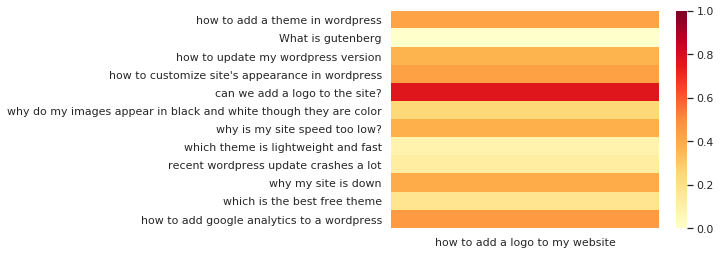

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)
doc = ["how to add a theme in wordpress","What is gutenberg",
       "how to update my wordpress version",
       "how to customize site's appearance in wordpress",
       "can we add a logo to the site?",
       "why do my images appear in black and white though they are color",
       "why is my site speed too low?","which theme is lightweight and fast",
       "recent wordpress update crashes a lot","why my site is down",
       "which is the best free theme",
       "how to add google analytics to a wordpress"]
query = ["how to add a logo to my website"]

bank_vec = model(doc)

query_vec = model(query)

correlation = np.transpose(np.inner(query_vec,bank_vec))
print("Closest match found to '",query[0],"' is '",doc[np.argmax(correlation, axis=0)[0]],"'")
print("Correlation matrix shape: ",correlation.shape)
sns.set(font_scale=1)
g = sns.heatmap(
      correlation,
      xticklabels=query,
      yticklabels=doc,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")


